In [1]:
# python main_inference_multimodal.py \
#         --model=LLM_Inference_Multimodal \
#         --model.llm_type="seqclf" \
#         --model.ckpt_path="models/multitask_multimodal_multilingual/version_11/epoch=3-step=776.ckpt" \
#         --model.config_path="models/multitask_multimodal_multilingual/version_11/config.yaml" \
#         --model.task="seqclf_singlemodal_wishquery2tax" \
#         --model.output_dir="models/multitask_multimodal_multilingual/version_11" \
#         --model.write_interval="batch" \
#         --data=JSONListData \
#         --data.llm_type="seqclf" \
#         --data.label_map_file="datasets/taxonomy/wish_v1.2.1_newtax_allpaths_withunknown.txt" \
#         --data.label_type="multilabel_taxonomy" \
#         --data.data_source_yaml_path="datasets/multimodal_multitask/wish_qcv2_tahoe_queries_for_debug.yaml" \
#         --data.input_dict="{'template': '{query}', 'task_prefix': 'Classify query: '}" \
#         --data.output_dict="{'template': '{query}'}" \
#         --data.data_source_type="dvc" \
#         --data.model_name="microsoft/Multilingual-MiniLM-L12-H384" \
#         --data.batch_size=50 \
#         --data.max_length=50 \
#         --data.num_workers=0 \
#         --data.predict_on_test=false \
#         --data.overwrite_cache=true \
#         --data.force_download_hfdata=true \
#         --trainer.logger=false \
#         --trainer.enable_checkpointing=false \
#         --trainer.accelerator gpu \
#         --trainer.strategy ddp

In [2]:
import pandas as pd
import dvc.api
from tqdm import tqdm

In [3]:
df_predicts = pd.read_json(
    '/workspaces/multitask-llm-rnd/modelling/models/multitask_multimodal_multilingual/version_11/seqclf-epoch=3-step=776--wish_qcv2_tahoe_queries_for_debug--test.json', 
lines=True, chunksize=1000)

In [4]:
dfs = []
for df_predict in tqdm(df_predicts):
    dfs.append(df_predict[['preds', 'batch_indices']])

6628it [2:35:58,  1.41s/it]


In [5]:
df_cat = pd.concat(dfs)

In [6]:
df_cat = df_cat.sort_values('batch_indices')

In [7]:
df_cat.to_json('/workspaces/multitask-llm-rnd/modelling/models/multitask_multimodal_multilingual/version_11/seqclf-epoch=3-step=776--wish_qcv2_tahoe_queries_for_debug--test--nologits.json', 
               lines=True, orient='records')

In [8]:
len(df_cat)

6627925

In [9]:
df_data = pd.read_json(dvc.api.get_url( 
    'datasets/notebooks/quali_analysis_queryv0v2/query_classify_v2_20230311.json',
    repo='git@github.com:ContextLogic/multitask-llm-rnd.git'
), lines=True)

In [14]:
len(df_data)

6627925

In [15]:
df_data['batch_indices'] = list(range(len(df_data)))

In [16]:
df_merge = df_data.merge(df_cat[['preds', 'batch_indices']], on='batch_indices', how='inner')

In [17]:
len(df_merge)

6627925

In [19]:
df_merge.sample(1).to_dict('records')

[{'query': 'conector para chuveiro',
  'categories': '3431,3429,3433',
  'category_names': 'Shower Faucets,Shower Equipment,Shower Mounting Brackets',
  'weights': '0.5499190092086791,0.28613626956939703,0.056671749800443004',
  'batch_indices': 1600875,
  'preds': [['home improvement > bathroom fixtures > shower equipment > shower heads',
    0.211508110165596],
   ['home improvement > bathroom fixtures > shower equipment > shower faucets',
    0.07878024131059601],
   ['tools > machine tools & accessories > chuck', 0.030217060819268],
   ['home improvement > bathroom fixtures > bathroom sinks, faucets & accessories > basin faucets',
    0.020751867443323],
   ['mother & kids > feeding > nipple & accessories > pacifiers leashes & cases',
    0.018634542822837],
   ['mother & kids > feeding > nipple & accessories > pacifier',
    0.015546122565865001],
   ['home improvement > electrical equipments & supplies > electrical sockets & accessories > electrical sockets',
    0.01078413985669

In [55]:
df_merge = df_merge.rename(columns={ 
    'categories': 'categories_v2',
    'category_names': 'category_names_v2',
    'weights': 'weights_v2',
    'preds': 'preds_v3'
})

In [21]:
del df_merge['batch_indices']

In [58]:
df_merge.to_json('tahoe_20230311_v2v3_res.json', lines=True, orient='records')

In [ ]:
assert len(set(df_merge['query'])) == len(df_merge)

In [33]:
x = """winner_gmv	winner_relevance
-1	2
2	2
-1	2
-1	-1
-1	-1
0	-1
-1	2
-1	-1
-1	-1
0	0
0	0
2	2
-1	-1
-1	-1
-1	-1
-1	-1
-1	-1
0	0
-1	-1
-1	-1
2	2
2	2
0	0
0	0
0	0
2	2
2	2
2	2
0	0
2	2
2	2
-1	-1
2	2
0	0
2	2
2	2
2	2
-1	-1
-1	-1
-1	-1
0	2
2	2
0	0
-1	-1
0	0
0	0
2	2
-1	-1
0	0
0	0
2	2
2	2
0	0
2	2
0	0
2	2
0	0
0	2
-1	-1
-1	-1
2	2
2	2
2	2
2	2
-1	-1
-1	-1
2	2
-1	-1
0	0
2	2
-1	-1
2	2
-1	-1
-1	-1
0	0
2	2
-1	-1
2	2
-1	-1
0	0
2	2
-1	-1
-1	-1
2	2
2	-1
2	2
0	0
-1	-1
2	-1
0	0
-1	-1
-1	-1
-1	-1
-1	-1
2	2
2	2
2	2
0	0
2	2
2	2
2	2
-1	-1
-1	-1
2	2
-1	-1
-1	-1
-1	-1
-1	-1
-1	-1
0	0
0	2
2	2
2	2
2	2
2	2
-1	-1
-1	-1
-1	-1
-1	-1
2	2
0	0
-1	-1
-1	-1
-1	-1
-1	-1
-1	-1
0	0
-1	-1
0	0
-1	-1
0	0
-1	-1
0	0
0	0
-1	-1
-1	-1
-1	-1
-1	-1
-1	-1
-1	-1
-1	-1
-1	-1
-1	-1
-1	-1
2	2
-1	-1
0	0
-1	-1
0	-1
0	0
0	0
-1	-1
-1	-1
2	2
-1	-1
2	2
-1	-1
0	2
2	2
-1	-1
-1	-1
2	2
-1	-1
-1	-1
-1	-1
2	2
2	2
0	0
-1	-1
-1	-1
2	2
-1	-1
-1	-1
-1	-1
0	0
0	0
-1	-1
2	2
0	0
0	0
-1	-1
0	0
-1	-1
-1	-1
-1	-1
0	2
0	0
-1	-1
-1	-1
-1	-1
2	2
2	2
-1	-1
-1	-1
2	2
2	2
0	0
0	0
-1	-1
-1	-1
2	2
0	0
-1	-1
-1	-1
-1	-1
2	2
-1	-1
2	2
-1	-1
-1	-1
2	2
2	2
2	2
0	0
-1	-1
-1	-1
-1	-1
-1	-1
2	2
-1	-1
2	2
2	2
-1	-1
2	0
2	2
-1	-1
-1	-1
2	2
2	2
-1	-1
2	2
0	0
0	0
-1	-1
0	2
0	0
-1	-1
0	0
0	0
-1	-1
-1	-1
2	2
-1	-1
-1	-1
-1	-1
-1	-1
-1	-1
-1	-1
0	0
2	2
-1	-1
-1	-1
-1	-1
-1	-1
2	2
-1	-1
-1	-1
-1	-1
0	0
-1	-1
-1	-1
0	0
2	2
-1	-1
-1	-1
2	2
0	-1
0	0
-1	-1
0	0
"""

In [34]:
df_x = pd.DataFrame([i.split('\t') for i in x.split('\n')])

In [35]:
df_x.columns = ['winner_gmv', 'winner_relevance']

In [36]:
df_x = df_x.loc[1:]

In [37]:
df_x = df_x[df_x['winner_gmv'].apply(lambda x: len(x) > 0)]

In [38]:
len(df_x)

270

<AxesSubplot: ylabel='winner_gmv'>

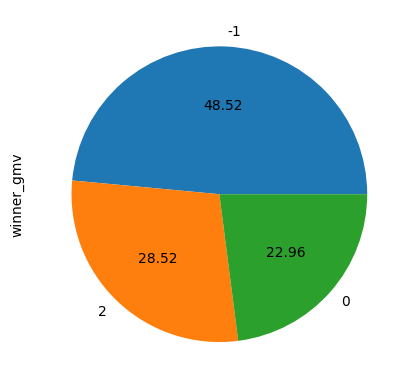

In [39]:
df_x.winner_gmv.value_counts().plot.pie(autopct='%.2f')

<AxesSubplot: ylabel='winner_relevance'>

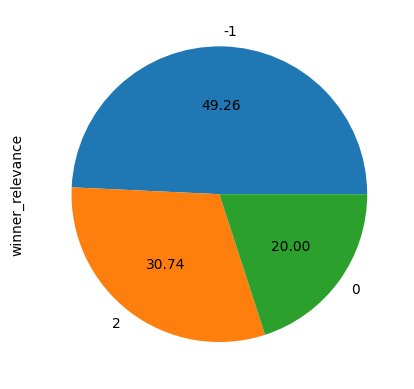

In [41]:
df_x.winner_relevance.value_counts().plot.pie(autopct='%.2f')

In [42]:
y = """comment
















ambiguous

ambiguous



2 clearly wrong
i don't know if wish shoppers buy a lot of fabrics for arts and crafts

0 clearly wrong

0 clearly wrong
2 clearly wrong
0 clearly wrong
0 clearly wrong
ambiguous


0 clearly wrong
0 clearly wrong
little ambiguos, but 2 is better
both are good

both are good





2 clearly wrong


2 clearly wrong
2 clearly wrong



0 clearly wrong
2 clearly wrong








0 clearly wrong




2 clearly wrong













need to create better categories for this query


0 clearly wrong


both are relevant
2 clearly wrong





0 clearly wrong

2 clearly wrong






don't think we can support this query

both are good












0 clearly wrong
2 clearly wrong





2 clearly wrong
both equally good
2 clearly wrong


both make sense

2 clearly wrong


both are good
both are good
both are good
ambiguous


we need better categories for food if we plan to sell this


both are plausible


both are plausible




0 clearly wrong








both are relevant
ambiguous




ambiguous








0 clearly wrong




both are good

not looking for anything specific

















both are plausible

both are plausible




















both are good



both are good






both are good
2 clearly wrong

both are good
not sure what the intent is



intent could be anything




0 clearly wrong

both are good




ambiguous
ambiguous






both are good

both are good


0 is more general, 2 is more limited to baby and toddlers"""

In [43]:
df_y = pd.DataFrame(y.split('\n'))

In [45]:
df_y.columns = ['comment']

In [46]:
df_y = df_y.loc[1:]

In [49]:
df_y['comment'] = df_y['comment'].apply(lambda x: 'Null' if len(x) == 0 else x)

<AxesSubplot: ylabel='comment'>

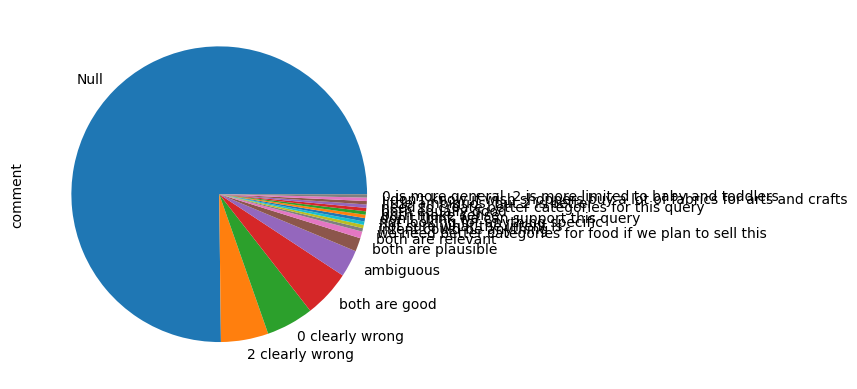

In [51]:
df_y.comment.value_counts().plot.pie()